# Complete cartography

> In this experiment, we'll train on a reduced dataset with less initial conditions, and show how ML can fill the gaps in between the points in the phase space.

In [1]:
from mlchaos.all import *
from tsai.all import *

In [2]:
base_path = Path.home()
cartography_folderpath = base_path/'data/fli_rotnum/model_1/eps=0.01' # *
fnames_poinc_map = [cartography_folderpath/'Poincare.plt']
fnames_index = [cartography_folderpath/'index_fli_rotnum_birav.plt']
fnames = L(fnames_poinc_map).zipwith(fnames_index)
fnames

(#1) [(Path('/home/victor/data/fli_rotnum/model_1/eps=0.01/Poincare.plt'), Path('/home/victor/data/fli_rotnum/model_1/eps=0.01/index_fli_rotnum_birav.plt'))]

In [3]:
data = TSDataChaos.from_poincare_and_index_files(fnames, index_col=index_cols['birav'])
data

TSDataChaos:
 Datasets names (concatenated): ['eps=0.01']
 Filenames:                     [(Path('/home/victor/data/fli_rotnum/model_1/eps=0.01/Poincare.plt'), Path('/home/victor/data/fli_rotnum/model_1/eps=0.01/index_fli_rotnum_birav.plt'))]
 Data shape: (10201, 2, 200)
 Targets shape: (10201,)
 Nb Samples: 10201
 Nb Channels:           2
 Sequence Length: 200

Remove the uncertain motions (class == -1)

In [6]:
data.remove_uncertainty()
data

TSDataChaos:
 Datasets names (concatenated): ['eps=0.01']
 Filenames:                     [(Path('/home/victor/data/fli_rotnum/model_1/eps=0.01/Poincare.plt'), Path('/home/victor/data/fli_rotnum/model_1/eps=0.01/index_fli_rotnum_birav.plt'))]
 Data shape: (10197, 2, 200)
 Targets shape: (10197,)
 Nb Samples: 10197
 Nb Channels:           2
 Sequence Length: 200

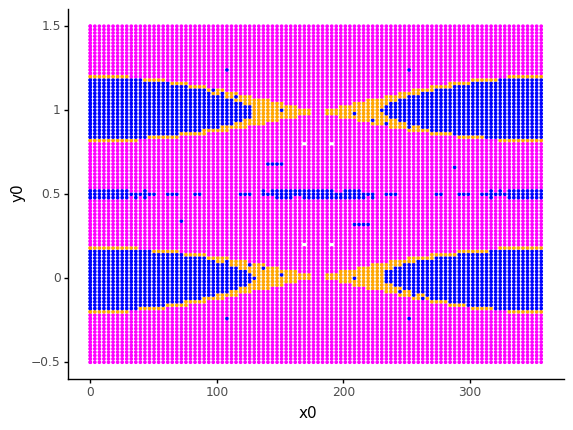

<ggplot: (8744327547176)>

In [17]:
show_labelled_ic_map(data.x, preds=data.y.astype(int), color_values=['orange', 'magenta', 'blue'])